In [ ]:
pip install boto3

In [117]:
import boto3
import json
import base64

bedrock = boto3.client('bedrock-runtime')

MULTIMODAL EMBEDDINGS

IMAGE TO EMBED ->

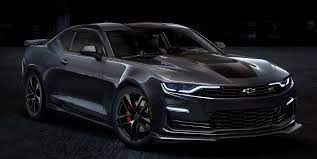

In [118]:
# read in image and create embeddings for image and caption
with open("/content/sample_data/camaro.jfif", "rb") as image_file:
    input_image = base64.b64encode(image_file.read()).decode('utf8')


body = json.dumps(
    {
        "inputText": "Gray sports car",
        "inputImage": input_image
    }
)

In [119]:
response = bedrock.invoke_model(
	body=body,
	modelId="amazon.titan-embed-image-v1",
	accept="application/json",
	contentType="application/json"
)

In [120]:
response_body = json.loads(response.get("body").read())
car_embedding = response_body.get("embedding")
car_embedding[:2]

[0.0069486527, 0.026003001]

In [121]:
# Vector embedding of similar caption
body = json.dumps(
    {
        "inputText": "sports car",
    }
)

In [122]:
response = bedrock.invoke_model(
	body=body,
	modelId="amazon.titan-embed-image-v1",
	accept="application/json",
	contentType="application/json"
)

In [123]:
response_body = json.loads(response.get("body").read())
text_embedding = response_body.get("embedding")
text_embedding[:2]

[0.025878906, 0.015136719]

In [124]:
# Calculate cosine similarity on text vs image/caption embeddings
import numpy as np

dot_product = np.dot(np.array(car_embedding), np.array(text_embedding))
norm_vector1 = np.linalg.norm(car_embedding)
norm_vector2 = np.linalg.norm(text_embedding)
cosine_similarity_value = dot_product / (norm_vector1 * norm_vector2)
print(f'Cosine similarity is {cosine_similarity_value}')

Cosine similarity is 0.7329906243935072


In [125]:
np.array(car_embedding).shape

(1024,)